In [180]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-09-11 00:47:40,653: Credentials are already in use. The existing account in the session will be replaced.


# Chapter 6 - Understanding Quantum Gates

In [181]:
# Will execute the circuit on the state vector (sv) simulator
# Returns state vector results, circuit diagram, and QSphere 
def execute_circuit_sv(quantum_circuit):
    #Create a state vector simulator
    statevector_simulator = Aer.get_backend('statevector_simulator')
    #Execute the circuit on the simulator
    result = execute(quantum_circuit, statevector_simulator).result()
    #Assign state vector results
    statevector_results  = result.get_statevector(quantum_circuit)
    #Draw the circuit diagram
    circuit_diagram = quantum_circuit.draw()
    #Draw the Qsphere 
    q_sphere = plot_state_qsphere(statevector_results)
    #Return the results, circuit diagram, and QSphere		
    return statevector_results, circuit_diagram, q_sphere


In [182]:
#X-gate 
#Create the single qubit circuit
qc = QuantumCircuit(1)
#Add an X gate to the qubit
qc.x(0)
#Execute the circuit and capture all the results
result, img, qsphere = execute_circuit_sv(qc)


In [183]:
result

array([0.+0.j, 1.+0.j])

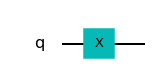

In [184]:
img

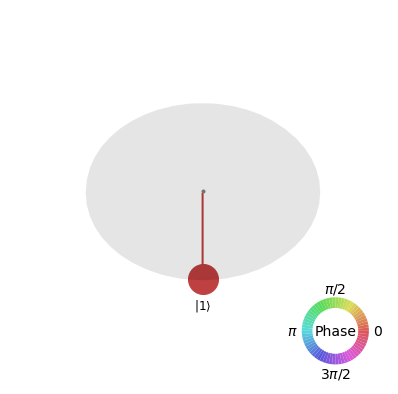

In [185]:
qsphere

In [186]:
#Y-gate 
#Create the single qubit circuit
qc = QuantumCircuit(1)
#Add a Y gate to the qubit
qc.y(0)
#Execute the circuit and capture all the results
result, img, qsphere = execute_circuit_sv(qc)


In [187]:
result

array([0.-0.j, 0.+1.j])

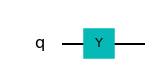

In [188]:
img

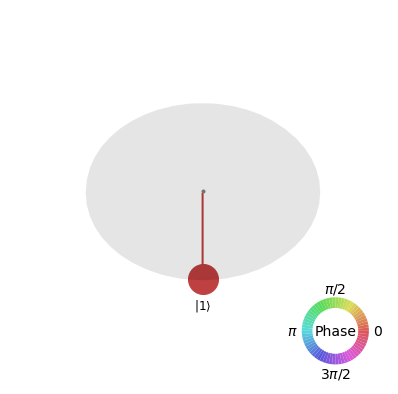

In [189]:
qsphere

In [190]:
#H-gate 
#Create the single qubit circuit
qc = QuantumCircuit(1)
#Add an H gate to the qubit
qc.h(0)
#Execute the circuit and capture all the results
result, img, qsphere = execute_circuit_sv(qc)


In [191]:
result

array([0.70710678+0.j, 0.70710678+0.j])

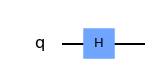

In [192]:
img

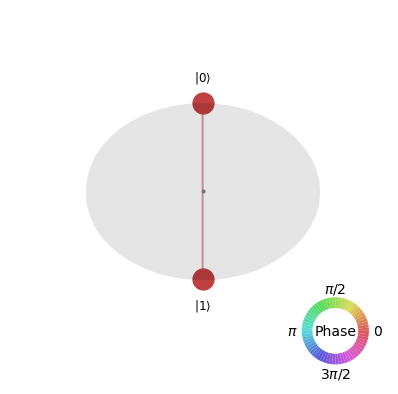

In [193]:
qsphere

In [194]:
#Z-gate 
#Create the single qubit circuit
qc = QuantumCircuit(1)
#Add an H gate to the qubit to set the qubit in superposition
qc.h(0)
#Add a Z gate to the qubit to rotate out of phase by /2
qc.z(0)
#Execute the circuit and capture all the results
result, img, qsphere = execute_circuit_sv(qc)


In [195]:
result

array([ 0.70710678+0.j, -0.70710678+0.j])

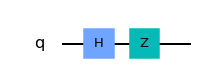

In [196]:
img

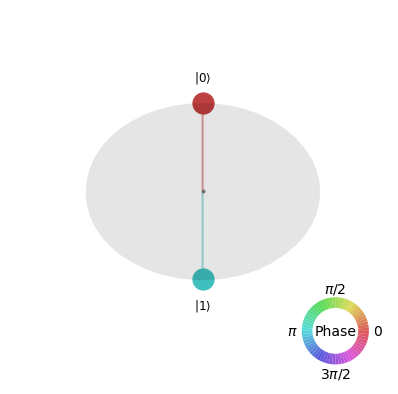

In [197]:
qsphere

In [198]:
#S-gate 
#Create the single qubit circuit
qc = QuantumCircuit(1)
#Add an H gate to the qubit to drop the vector onto the X-axis
qc.h(0)
#Add an S gate to the qubit
qc.s(0)
#Execute the circuit and capture all the results
result, img, qsphere = execute_circuit_sv(qc)


In [199]:
result

array([ 0.70710678+0.j        , -0.        +0.70710678j])

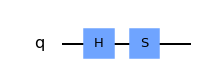

In [200]:
img

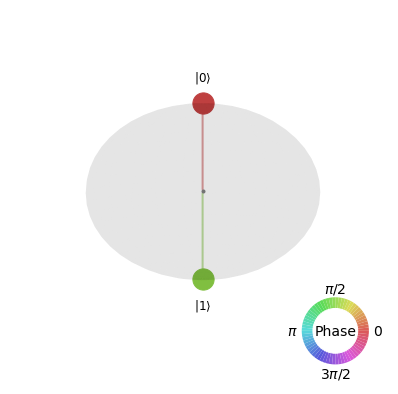

In [201]:
qsphere

In [202]:
#Sdg-gate 
#Create the single qubit circuit
qc = QuantumCircuit(1)
#Add an H gate to the qubit to drop the vector onto the X-axis
qc.h(0)
#Add an S† gate to the qubit
qc.sdg(0)
#Execute the circuit and capture all the results
result, img, qsphere = execute_circuit_sv(qc)


In [203]:
result

array([0.70710678+0.j        , 0.        -0.70710678j])

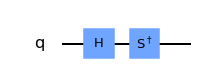

In [204]:
img

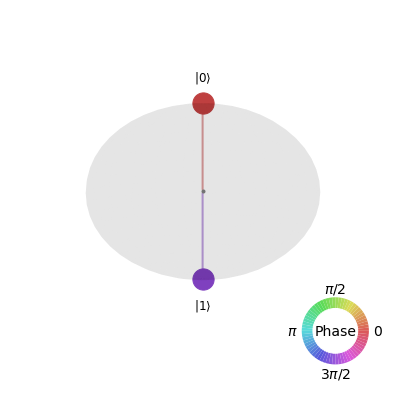

In [205]:
qsphere

In [206]:
#T-gate 
#Create the single qubit circuit
qc = QuantumCircuit(1)
#Add an H gate to the qubit to drop the vector onto the X-axis
qc.h(0)
#Add a T gate to the qubit
qc.t(0)
#Execute the circuit and capture all the results
result, img, qsphere = execute_circuit_sv(qc)


In [207]:
result

array([0.70710678+0.j , 0.5       +0.5j])

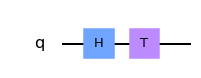

In [208]:
img

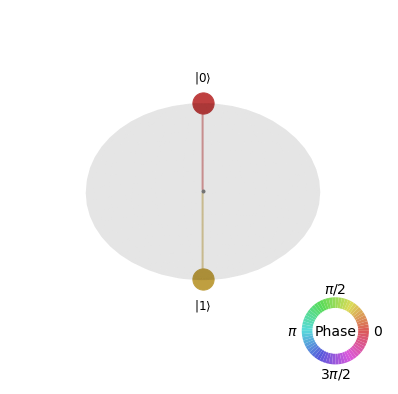

In [209]:
qsphere

In [210]:
#Tdg-gate 
#Create the single qubit circuit
qc = QuantumCircuit(1)
#Add an H gate to the qubit to drop the vector onto the X-axis
qc.h(0)
#Add a Tdg gate to the qubit
qc.tdg(0)
#Execute the circuit and capture all the results
result, img, qsphere = execute_circuit_sv(qc)


In [211]:
result

array([0.70710678+0.j , 0.5       -0.5j])

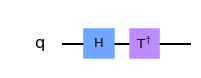

In [212]:
img

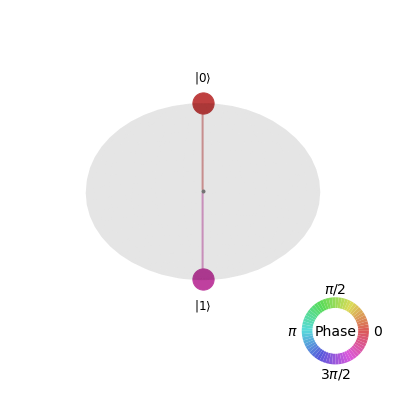

In [213]:
qsphere

In [214]:
#Rz-gate 
#Create the single qubit circuit
qc = QuantumCircuit(1)
#Import pi from the math library
from math import pi
#Add an H gate to help visualize phase rotation
qc.h(0)
#Add an RZ gate with an arbitrary angle theta of pi/6
qc.rz(pi/6, 0)
#Execute the circuit and capture all the results
result, img, qsphere = execute_circuit_sv(qc)


In [215]:
result

array([0.70710678+0.j        , 0.61237244+0.35355339j])

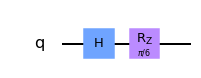

In [216]:
img

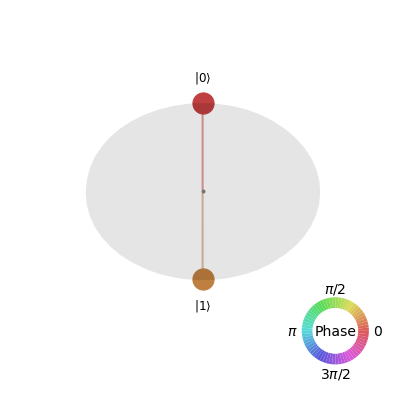

In [217]:
qsphere

In [218]:
#U3-gate
from math import pi
#Create a single qubit circuit
qc = QuantumCircuit(1)
#Add a U3 gate and rotate all parameters by pi/2, and apply it to the qubit
qc.u3(pi/2, pi/2, pi/2, 0)
#Execute the circuit and capture all the results
result, img, qsphere = execute_circuit_sv(qc)


In [219]:
result

array([7.07106781e-01+0.j        , 4.32978028e-17+0.70710678j])

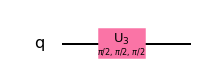

In [220]:
img

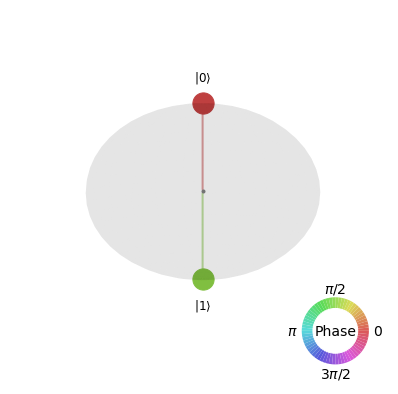

In [221]:
qsphere

In [222]:
#U2-gate
from math import pi
#Create a single qubit circuit
qc = QuantumCircuit(1)
#Add a U2 gate and rotate all parameters by pi/2, and apply it to the qubit
qc.u2(pi/2, pi/2, 0)
#Execute the circuit and capture all the results
result, img, qsphere = execute_circuit_sv(qc)


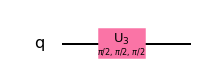

In [223]:
qc_decomposed = qc.decompose()
qc_decomposed.draw()


In [224]:
#U1-gate
from math import pi
#Create a two qubit circuit
qc = QuantumCircuit(1)
qc.h(0)
#Add an U1 gate and rotate by pi/2
qc.u1(pi/2, 0)
#Execute the circuit and capture all the results
result, img, qsphere = execute_circuit_sv(qc)


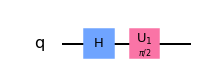

In [225]:
img

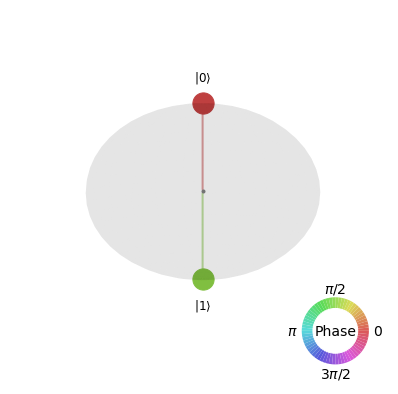

In [226]:
qsphere

In [232]:
# Will execute the circuit on the qasm simulator
# Returns results, circuit diagram, and histogram 
def execute_circuit(quantum_circuit):
    #Create a qasm simulator
    simulator = Aer.get_backend('qasm_simulator')
    #Execute the circuit on the simulator
    result = execute(quantum_circuit, simulator, shots=1024).result()
    #Get the result counts 
    results = result.get_counts(quantum_circuit)
    #Draw the circuit diagram
    circuit_diagram = quantum_circuit.draw()
    #Create a histogram of the results
    histogram = plot_histogram(results)
    #Return the results, circuit diagram, and histogram
    return results, circuit_diagram, histogram


In [233]:
#CNOT-gate 
#Create a two qubit circuit
qc = QuantumCircuit(2)
#Add an H gate to the qubit
qc.h(0)
#Add an CNOT gate where, control = first, target = second qubit
qc.cx(0,1)
#Measure all qubits and send results to classical bits 
qc.measure_all()
#Execute the circuit and capture all the results
result, img, histogram = execute_circuit(qc)


In [234]:
result

{'00': 525, '11': 499}

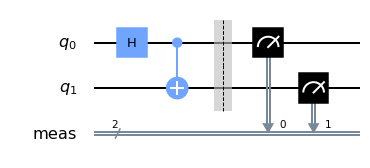

In [235]:
img

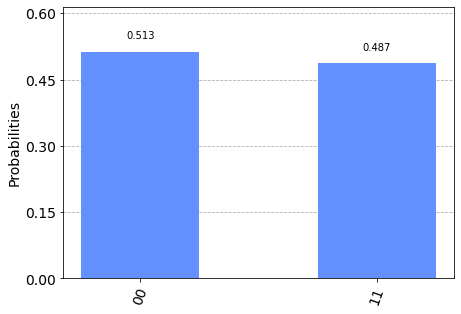

In [236]:
histogram

In [237]:
#Toffoli (CCX)-gate
from math import pi
#Create a three qubit circuit
qc = QuantumCircuit(3)
#Add the Toffoli gate (CCX)
qc.ccx(0,1,2)
#Execute the circuit and capture all the results
result, img, qsphere = execute_circuit_sv(qc)


In [238]:
result

array([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

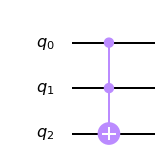

In [239]:
img

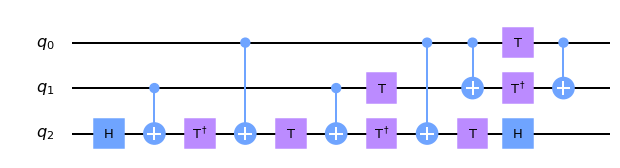

In [240]:
qc_decomposed = qc.decompose()
qc_decomposed.draw()


In [242]:
#Swap-gate
from math import pi
#Create a two qubit circuit
qc = QuantumCircuit(2)
#Qubit 0 is initialized to |0> state
#Prepare qubit 1 to the |1> state
qc.x(1)
#Now swap gates
qc.swap(0,1)
#Execute the circuit and capture all the results
result, img, qsphere = execute_circuit_sv(qc)


In [243]:
result

array([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j])

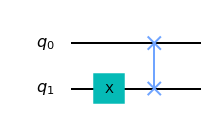

In [244]:
img

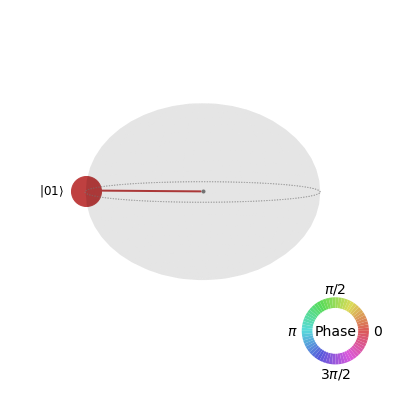

In [245]:
qsphere

In [246]:
#Measurement operator 
#Create two separate two-qubit, and two-classical bit circuits
qc1 = QuantumCircuit(2,2)
qc2 = QuantumCircuit(2,2)
#In the first circuit (qc1), measure qubits individually 
qc1.measure(0,0)
qc1.measure(1,1)
#In the second circuit (qc2) measure using a list
qc2.measure([0,1],[0,1])
#Execute the circuit and capture all the results
result, img, histogram = execute_circuit(qc1)
result2, img2, histogram2 = execute_circuit(qc2)


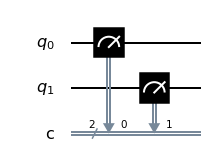

In [247]:
img

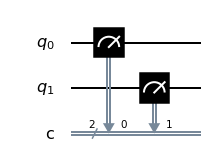

In [248]:
img2

In [249]:
import qiskit.tools.jupyter
%qiskit_version_table